                 pm2.5       DEWP       TEMP         PRES         Iws  \
datetime                                                                
2010-01-01         NaN -18.750000  -6.750000  1017.083333   14.458333   
2010-01-02  145.958333  -8.500000  -5.125000  1024.750000   24.860000   
2010-01-03   78.833333 -10.125000  -8.541667  1022.791667   70.937917   
2010-01-04   31.333333 -20.875000 -11.500000  1029.291667  111.160833   
2010-01-05   42.458333 -24.583333 -14.458333  1033.625000   56.920000   

                   Is   Ir  
datetime                    
2010-01-01   0.000000  0.0  
2010-01-02   0.708333  0.0  
2010-01-03  14.166667  0.0  
2010-01-04   0.000000  0.0  
2010-01-05   0.000000  0.0  


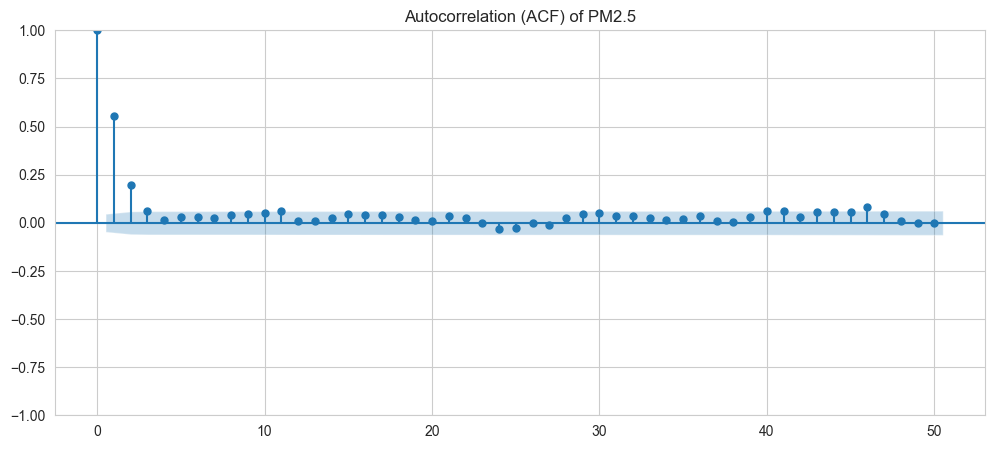

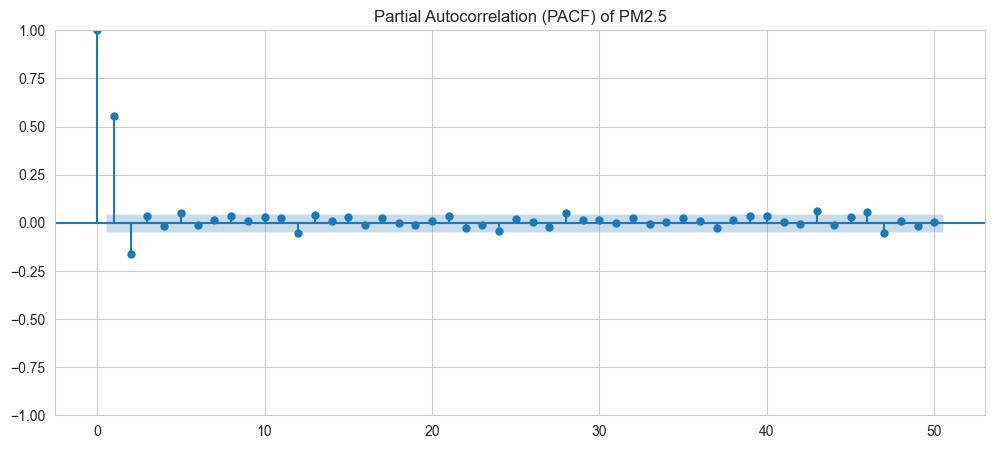

c:\Users\vatsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vatsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vatsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vatsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  pm2.5   No. Observations:                 1826
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -9954.417
Date:                Sun, 19 Oct 2025   AIC                          19920.834
Time:                        14:35:17   BIC                          19953.893
Sample:                    01-01-2010   HQIC                         19933.028
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.4775      3.942     24.981      0.000      90.751     106.204
ar.L1         -0.6021      0.033    -18.213      0.000      -0.667      -0.537
ar.L2          0.3722      0.030     12.457      0.0

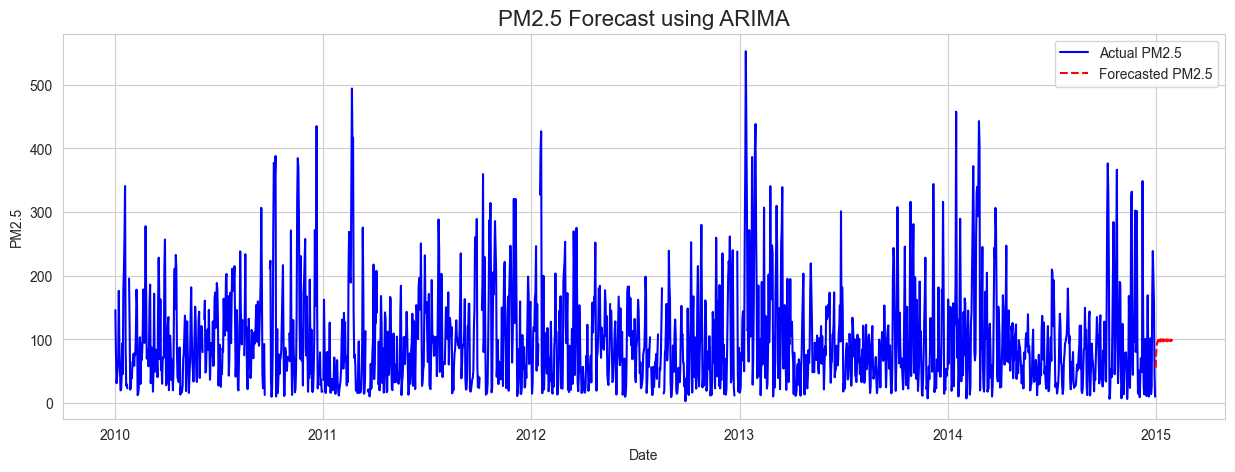

Forecasted PM2.5 for next 30 days saved at 'data/processed/pm25_forecast.csv'


In [1]:
# ===============================
# AirPulse: Step 3 – ARIMA Modeling & Forecasting
# ===============================

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_style('whitegrid')
%matplotlib inline

# Step 2: Load processed daily PM2.5 data
data_path = '../data/processed/pm25_daily.csv'
df_daily = pd.read_csv(data_path, index_col='datetime', parse_dates=True)

# Step 3: Inspect dataset
print(df_daily.head())

# Step 4: Plot ACF & PACF to select AR and MA terms
plt.figure(figsize=(12,5))
plot_acf(df_daily['pm2.5'].dropna(), lags=50, ax=plt.gca())
plt.title("Autocorrelation (ACF) of PM2.5")
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(df_daily['pm2.5'].dropna(), lags=50, ax=plt.gca())
plt.title("Partial Autocorrelation (PACF) of PM2.5")
plt.show()

# Step 5: Fit ARIMA model
# Since series is stationary, d=0
# p and q can be inferred from PACF (AR) and ACF (MA)
# Example: p=2, d=0, q=2 (adjust based on plots)
model = ARIMA(df_daily['pm2.5'], order=(2,0,2))
arima_result = model.fit()

# Step 6: Summary of the model
print(arima_result.summary())

# Step 7: Forecast next 30 days
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df_daily.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_df = pd.DataFrame({'forecast': forecast.predicted_mean}, index=forecast_index)

# Step 8: Plot actual vs forecast
plt.figure(figsize=(15,5))
plt.plot(df_daily['pm2.5'], label='Actual PM2.5', color='blue')
plt.plot(forecast_df['forecast'], label='Forecasted PM2.5', color='red', linestyle='--')
plt.title("PM2.5 Forecast using ARIMA", fontsize=16)
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.legend()
plt.show()

# Step 9: Save forecast results
forecast_df.to_csv('../data/processed/pm25_forecast.csv')
print("Forecasted PM2.5 for next 30 days saved at 'data/processed/pm25_forecast.csv'")
